In [44]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [11]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [12]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [13]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
113,spam,GENT! We are trying to contact you. Last weeke...,NaN,NaN,NaN
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
5244,ham,thanks for the temales it was wonderful. Thank...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN
2543,ham,Package all your programs well,NaN,NaN,NaN
333,ham,Any chance you might have had with me evaporat...,NaN,NaN,NaN
4026,ham,"Yes, princess. Are you going to make me moan?",NaN,NaN,NaN
4087,ham,He needs to stop going to bed and make with th...,NaN,NaN,NaN
1212,ham,"Yo, the game almost over? Want to go to walmar...",NaN,NaN,NaN
1539,ham,You're not sure that I'm not trying to make xa...,NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

## DATA CLEANING ##


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
# dropping the columns with huge null value i.e. last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [20]:
df.sample(5)

,v1,v2
2823,ham,No need to buy lunch for me.. I eat maggi mee..
172,ham,What time you coming down later?
653,ham,Fine i miss you very much.
4942,ham,Check mail.i have mailed varma and kept copy t...
1541,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...


In [22]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2426,spam,Valentines Day Special! Win over å£1000 in our...
5448,ham,"aight we can pick some up, you open before ton..."
2226,ham,If you have belive me. Come to my home.
5146,ham,Oh unintentionally not bad timing. Great. Fing...
5500,ham,Love has one law; Make happy the person you lo...


In [24]:
#giving ham and span the numerical representation
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [25]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
df['target']=encoder.fit_transform(df['target'])

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
#checking duplicated values
df.duplicated().sum()

403

In [30]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

0

In [33]:
df.shape

(5169, 2)

## EDA ##


In [34]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

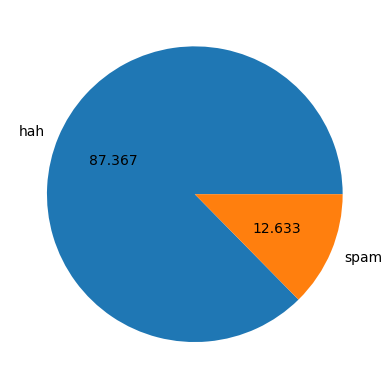

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['hah','spam'],autopct="%0.3f")
plt.show()

In [38]:
#data is imbalanced

In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\16ary\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [45]:
df['num_characters']= df['text'].apply(len)

In [43]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
#numbers of words
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [51]:
#numbers of sentence
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [52]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
df.describe()

,target,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [55]:
# details ham description
df[df['target']==0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [56]:
# details spam description
df[df['target']==1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [57]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

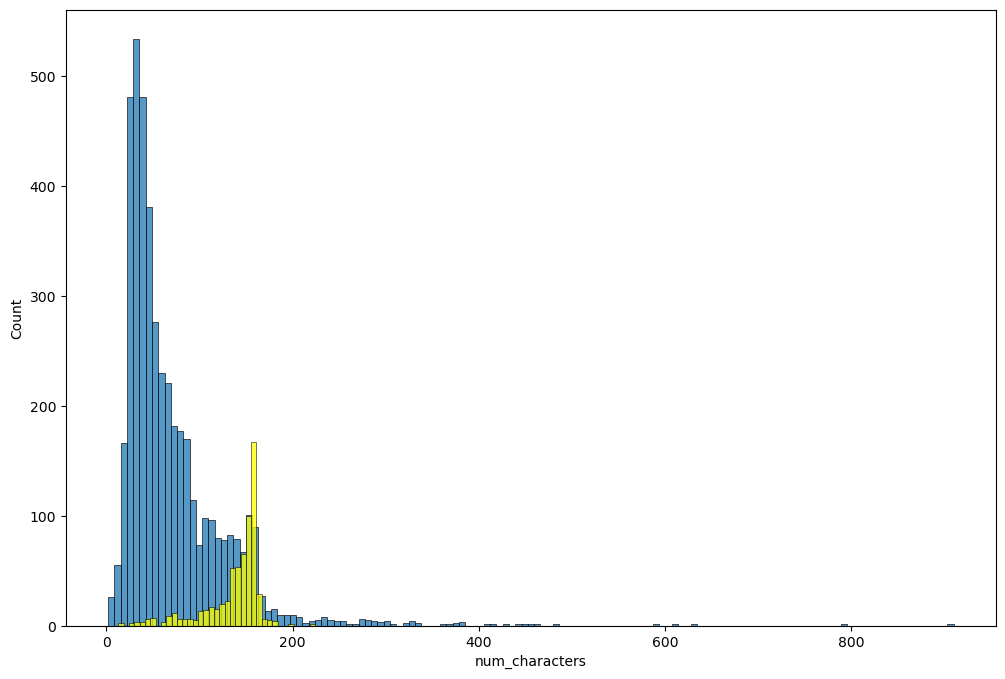

In [60]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')

<AxesSubplot:xlabel='num_word', ylabel='Count'>

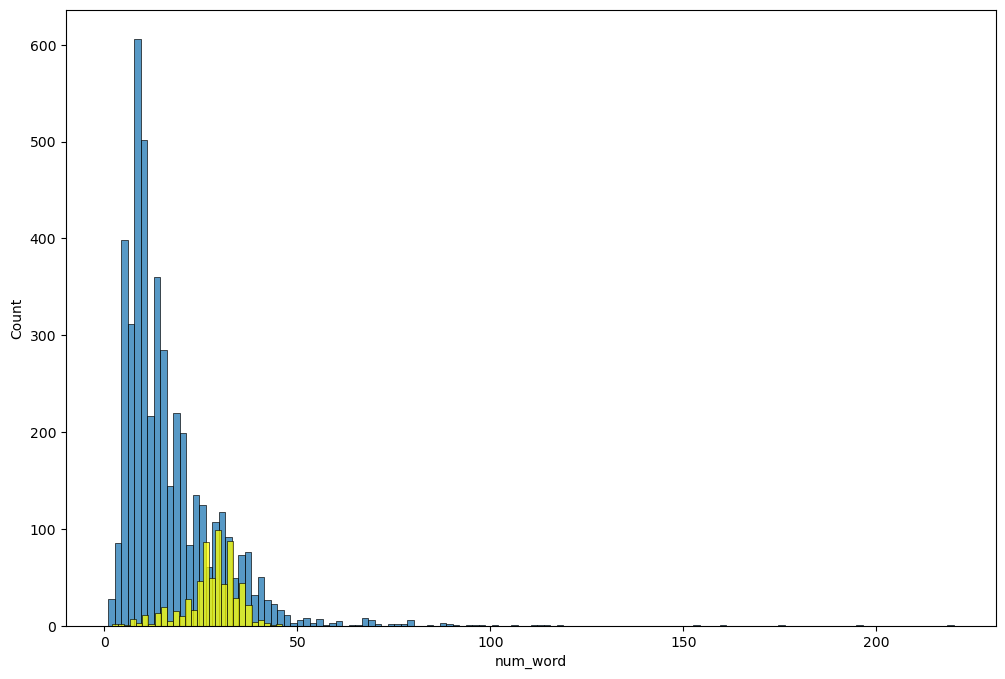

In [61]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='yellow')

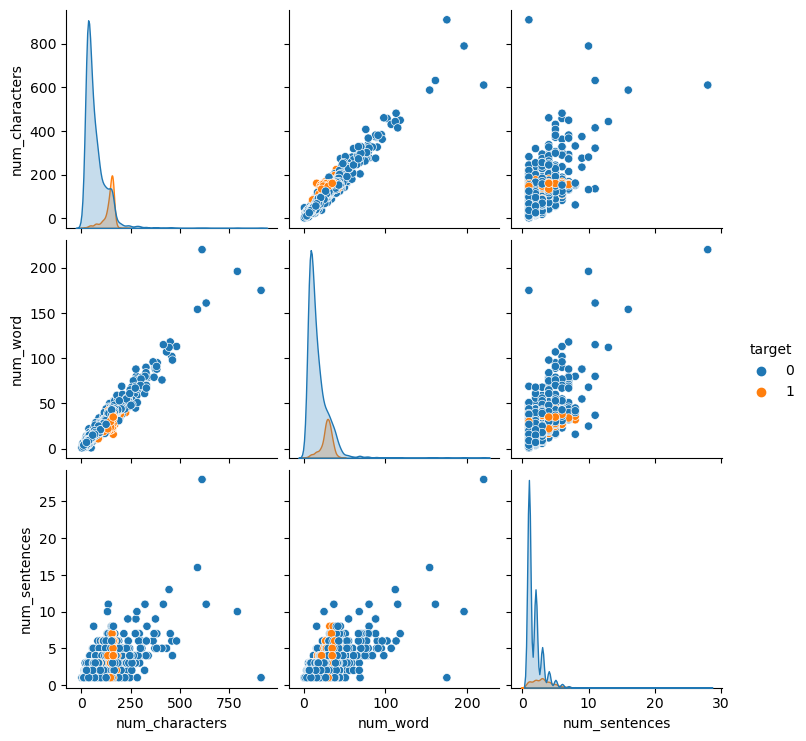

In [62]:
sns.pairplot(df,hue='target')

In [63]:
df.corr()

,target,num_characters,num_word,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_word,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

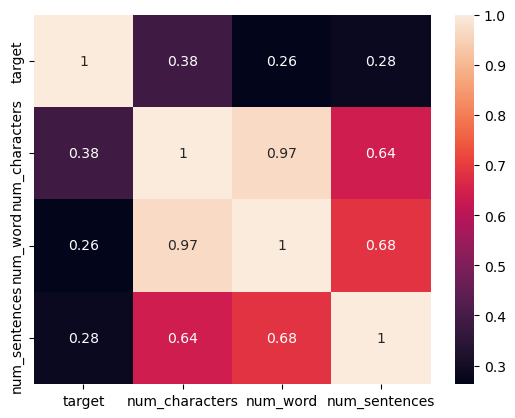

In [65]:
sns.heatmap(df.corr(),annot=True)

## DATA PREPROCESSING ##

In [70]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16ary\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [90]:
def text_processing(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    z=[]
    for i in text:
        if i.isalnum() and i not in string.punctuation and i not in stopwords.words('english'):
            z.append(i)
    text=z[:]
    z.clear()
    for i in text:
        z.append(ps.stem(i))
    return " ".join(z)

In [93]:
text_processing(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [95]:
df['Processed_text']=df['text'].apply(text_processing)

In [96]:
df.head()

,target,text,num_characters,num_word,num_sentences,Processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [101]:
from wordcloud import WordCloud
wc= WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [103]:
spam_wc=wc.generate(df[df['target']==1]['Processed_text'].str.cat(sep=" "))

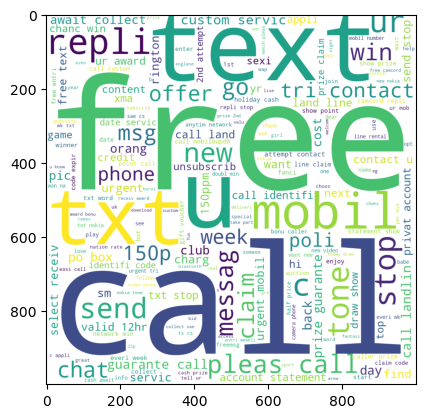

In [104]:
plt.imshow(spam_wc)

In [106]:
ham_wc=wc.generate(df[df['target']==0]['Processed_text'].str.cat(sep=" "))

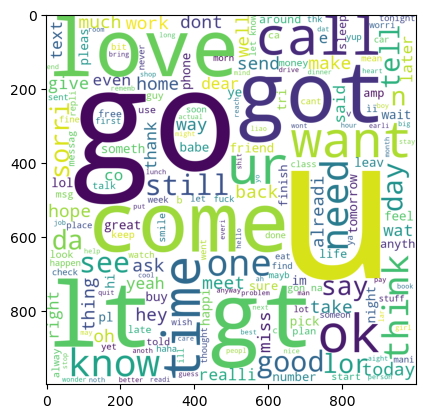

In [107]:
plt.imshow(ham_wc)

In [108]:
spam_corpus = []
for msg in df[df['target']==1]['Processed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [109]:
len(spam_corpus)

9939

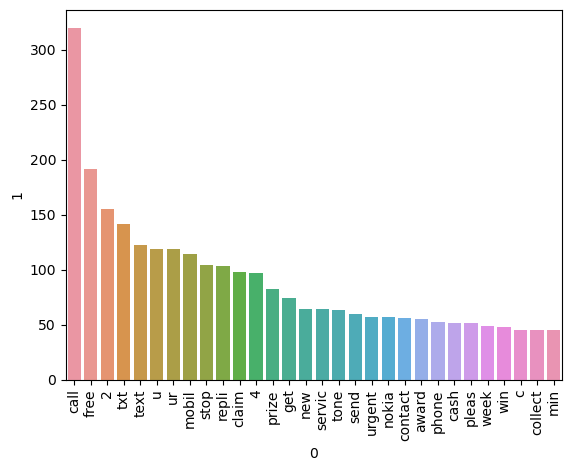

In [119]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [120]:
ham_corpus = []
for msg in df[df['target']==0]['Processed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [121]:
len(ham_corpus)

35394

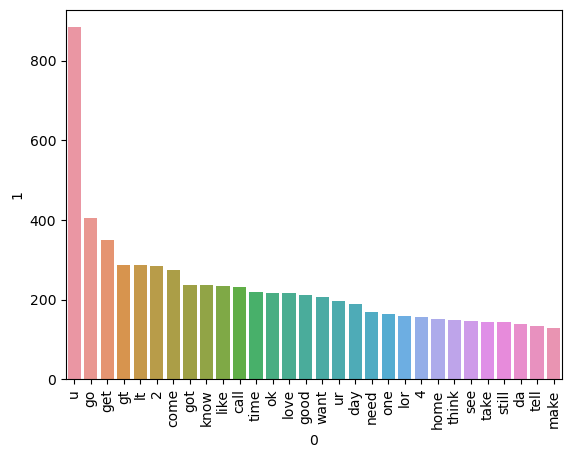

In [122]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## MODEL BUILDING ##

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [130]:
X=cv.fit_transform(df['Processed_text']).toarray()

In [220]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [221]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
X.shape

(5169, 6708)

In [223]:
Y=df['target'].values

In [224]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [227]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [228]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [229]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [230]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8781431334622823
[[791 105]
 [ 21 117]]
0.527027027027027


In [231]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9729206963249516
[[881  15]
 [ 13 125]]
0.8928571428571429


In [232]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [343]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
#tfidf=TfidfVectorizer()

In [344]:
x1=tfidf.fit_transform(df['Processed_text']).toarray()

In [345]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x1 = scaler.fit_transform(x1)

In [346]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [347]:
x1.shape

(5169, 3000)

In [348]:
y1=df['target'].values

In [349]:
y1

array([0, 0, 1, ..., 0, 0, 0])

In [350]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=2)

In [351]:
gnb.fit(x1_train,y1_train)
y_pred4=gnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred4))
print(confusion_matrix(y1_test,y_pred4))
print(precision_score(y1_test,y_pred4))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [352]:
mnb.fit(x1_train,y1_train)
y_pred5=mnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred5))
print(confusion_matrix(y1_test,y_pred5))
print(precision_score(y1_test,y_pred5))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [353]:
bnb.fit(x1_train,y1_train)
y_pred6=bnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred6))
print(confusion_matrix(y1_test,y_pred6))
print(precision_score(y1_test,y_pred6))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [354]:
## tfidf --> mnb 

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [356]:
from sklearn.naive_bayes import BernoulliNB

In [357]:
svc = SVC(kernel= 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver= 'liblinear', penalty= 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators =50, random_state=2)
etc = ExtraTreesClassifier (n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier (n_estimators=50, random_state=2)

In [358]:
bnb1 = BernoulliNB()

In [359]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [360]:
def train_classifier(clf,x1_train,y1_train,x1_test,y1_test):
    clf.fit(x1_train,y1_train)
    y_predi =  clf.predict(x1_test)
    accuracy = (accuracy_score(y1_test,y_predi))
    precision = precision_score(y1_test,y_predi)
    
    return accuracy,precision

In [361]:
train_classifier(mnb,x1_train,y1_train,x1_test,y1_test)

(0.9709864603481625, 1.0)

In [362]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x1_train,y1_train,x1_test,y1_test)
    
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For Bgc
Accuracy -  0.9574468085106383
Precision -  0.8671875
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [340]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [341]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.902321,1.000000
2,NB,0.962282,1.000000
5,RF,0.971954,1.000000
8,ETC,0.979691,0.983471
0,SVC,0.974855,0.974576
4,LR,0.951644,0.948980
6,AdaBoost,0.965184,0.947368
10,xgb,0.970986,0.928571
9,GBDT,0.950677,0.914286
7,Bgc,0.958414,0.868217


In [194]:
performance_df1=pd.melt(performance_df,id_vars = 'Algorithm')

In [197]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.969052
8,GBDT,Accuracy,0.952611
9,Bgc,Accuracy,0.958414


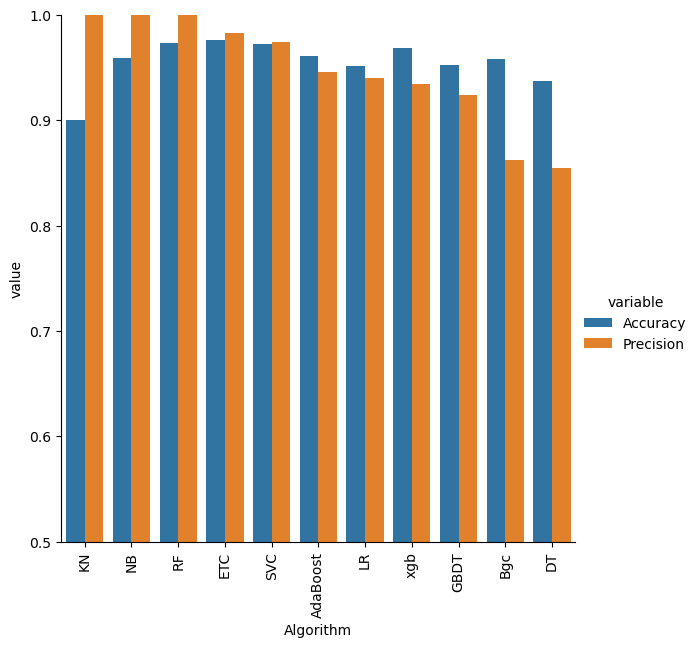

In [199]:
sns.catplot(x='Algorithm', y='value', hue = 'variable', data= performance_df1 ,kind='bar',height=6)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## MODEL IMPROVEMENT ##

In [263]:
 temp_df=pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [218]:
temp_df


,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.927466,0.811881
4,LR,0.958414,0.970297
5,RF,0.974855,0.982759
6,AdaBoost,0.960348,0.929204
7,Bgc,0.957447,0.867188
8,ETC,0.974855,0.974576
9,GBDT,0.947776,0.920000


In [268]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.978723,0.946154
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.966151,0.925620
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.967118,0.964286
7,xgb,0.969052,0.934426,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,Bgc,0.958414,0.862595,0.957447,0.867188


In [265]:
 temp_df1=pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_after_scaling':accuracy_scores,'Precision_after_scaling':precision_scores})

In [267]:
temp_df1


,Algorithm,Accuracy_after_scaling,Precision_after_scaling
0,SVC,0.966151,0.925620
1,KN,0.905222,0.976190
2,NB,0.978723,0.946154
3,DT,0.930368,0.836735
4,LR,0.967118,0.964286
5,RF,0.974855,0.982759
6,AdaBoost,0.960348,0.929204
7,Bgc,0.957447,0.867188
8,ETC,0.974855,0.974576
9,GBDT,0.947776,0.920000


In [269]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,Bgc,0.958414,0.862595


In [270]:
temp_df=temp_df.merge(temp_df1,on='Algorithm')

In [271]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_after_scaling,Precision_after_scaling
0,SVC,0.966151,0.925620,0.966151,0.925620
1,KN,0.905222,0.976190,0.905222,0.976190
2,NB,0.978723,0.946154,0.978723,0.946154
3,DT,0.930368,0.836735,0.930368,0.836735
4,LR,0.967118,0.964286,0.967118,0.964286
5,RF,0.974855,0.982759,0.974855,0.982759
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,Bgc,0.957447,0.867188,0.957447,0.867188
8,ETC,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.947776,0.920000,0.947776,0.920000


In [272]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_after_scaling,Precision_after_scaling
0,KN,0.900387,1.000000,0.905222,0.976190,0.905222,0.976190
1,NB,0.959381,1.000000,0.978723,0.946154,0.978723,0.946154
2,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.966151,0.925620,0.966151,0.925620
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LR,0.951644,0.940000,0.967118,0.964286,0.967118,0.964286
7,xgb,0.969052,0.934426,0.971954,0.943089,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000
9,Bgc,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188


In [363]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model4.pkl','wb'))